### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Import the Iris Dataset & Initialize the Dataframe

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris = pd.read_csv(csv_url, names = col_names)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 4. Data Preprocessing

#### 4.1 Convert Categorical to Numerical Values if applicable

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 4.2 Check for NULL values

In [4]:
iris.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

#### 4.3 Divide the dataset into Independent(X) and Dependent(Y)variables.

In [5]:
x = iris.iloc[:,:4]
y = iris['Species']
x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

#### 4.3 Split the dataset into training and testing datasets

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [8]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [10]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')


print("Accuracy:- ",accuracy)
print("Precision:- ",precision)
print("Recall:- ",recall)

Accuracy:-  0.9333333333333333
Precision:-  0.9333333333333333
Recall:-  0.9333333333333333


In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 15]], dtype=int64)

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
cmD = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"])

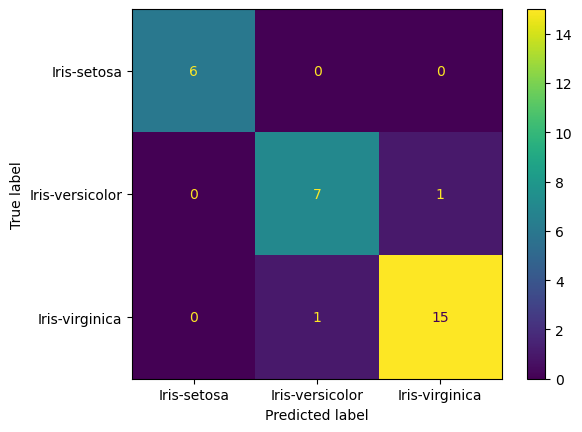

In [25]:
cmD.plot()